In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


In [3]:
df = pd.read_csv("train.csv")

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,51,technician,married,basic.6y,unknown,yes,yes,telephone,may,fri,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,50,blue-collar,married,basic.9y,no,yes,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,29,self-employed,single,professional.course,no,yes,no,cellular,may,wed,...,2,999,1,failure,-1.8,92.893,-46.2,1.281,5099.1,yes
3,42,services,married,university.degree,no,yes,no,cellular,apr,mon,...,6,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,no
4,25,technician,single,professional.course,no,yes,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,no


In [5]:
df.isna().sum().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32950 non-null  int64  
 1   job             32950 non-null  object 
 2   marital         32950 non-null  object 
 3   education       32950 non-null  object 
 4   default         32950 non-null  object 
 5   housing         32950 non-null  object 
 6   loan            32950 non-null  object 
 7   contact         32950 non-null  object 
 8   month           32950 non-null  object 
 9   day_of_week     32950 non-null  object 
 10  duration        32950 non-null  int64  
 11  campaign        32950 non-null  int64  
 12  pdays           32950 non-null  int64  
 13  previous        32950 non-null  int64  
 14  poutcome        32950 non-null  object 
 15  emp.var.rate    32950 non-null  float64
 16  cons.price.idx  32950 non-null  float64
 17  cons.conf.idx   32950 non-null 

### Age

<Axes: >

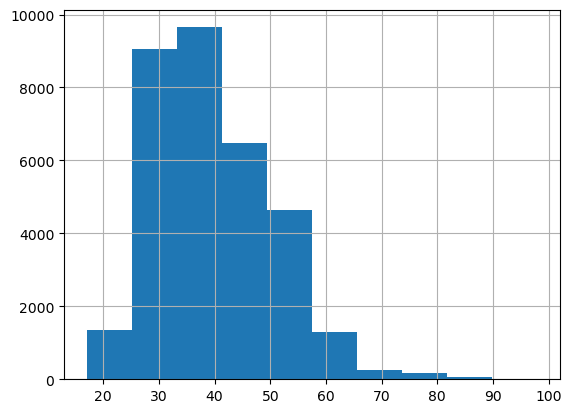

In [36]:
df['age'].hist()

### Job

In [37]:
df['job'].value_counts()

admin.           8341
blue-collar      7390
technician       5379
services         3189
management       2357
retired          1399
entrepreneur     1174
self-employed    1139
housemaid         857
unemployed        782
student           688
unknown           255
Name: job, dtype: int64

### Marital Status

In [38]:
df['marital'].value_counts()

married     19968
single       9238
divorced     3681
unknown        63
Name: marital, dtype: int64

In [39]:
19968/(len(df))

0.6060091047040971

### Education

In [40]:
df['education'].value_counts()

university.degree      9785
high.school            7626
basic.9y               4821
professional.course    4173
basic.4y               3320
basic.6y               1828
unknown                1384
illiterate               13
Name: education, dtype: int64

### Default

In [41]:
df['default'].value_counts()

no         26075
unknown     6872
yes            3
Name: default, dtype: int64

In [44]:
6872/len(df)

0.20855842185128984

### Housing

In [43]:
df['housing'].value_counts()

yes        17283
no         14866
unknown      801
Name: housing, dtype: int64

### Loan

In [45]:
df['loan'].value_counts()

no         27161
yes         4988
unknown      801
Name: loan, dtype: int64

### Contact

In [46]:
df['contact'].value_counts()

cellular     20893
telephone    12057
Name: contact, dtype: int64

### Month

In [47]:
df['month'].value_counts()

may    11039
jul     5760
aug     4910
jun     4248
nov     3327
apr     2059
oct      568
sep      452
mar      437
dec      150
Name: month, dtype: int64

### Day of the Week

In [48]:
df['day_of_week'].value_counts()

thu    6899
mon    6796
tue    6465
wed    6461
fri    6329
Name: day_of_week, dtype: int64

### Duration

<Axes: >

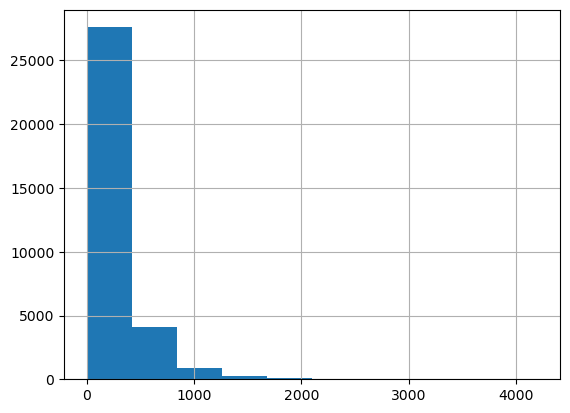

In [49]:
df['duration'].hist()

In [51]:
df['duration'].describe()

count    32950.000000
mean       258.247436
std        257.192944
min          0.000000
25%        102.000000
50%        180.000000
75%        320.000000
max       4199.000000
Name: duration, dtype: float64

### Campaign

### Pdays

### Previous

### Poutcome

### Emp.var.rate

### Cons.price.idx

### Cons.conf.idx

### Euribor3m

### Nr.employed

## Y

In [8]:
corr = df.corr(numeric_only=True)

In [9]:
corr

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,0.000334,0.003190,-0.036749,0.027901,-0.001621,0.000639,0.130679,0.009191,-0.020756
duration,0.000334,1.000000,-0.073863,-0.048131,0.020827,-0.028538,0.006150,-0.007736,-0.034499,-0.046360
campaign,0.003190,-0.073863,1.000000,0.051421,-0.078104,0.148835,0.126651,-0.013280,0.133456,0.141781
pdays,-0.036749,-0.048131,0.051421,1.000000,-0.590812,0.270868,0.074684,-0.085702,0.298457,0.373874
previous,0.027901,0.020827,-0.078104,-0.590812,1.000000,-0.420684,-0.201176,-0.054443,-0.455108,-0.500831
emp.var.rate,-0.001621,-0.028538,0.148835,0.270868,-0.420684,1.000000,0.773944,0.194406,0.972123,0.906342
cons.price.idx,0.000639,0.006150,0.126651,0.074684,-0.201176,0.773944,1.000000,0.057535,0.685438,0.517905
cons.conf.idx,0.130679,-0.007736,-0.013280,-0.085702,-0.054443,0.194406,0.057535,1.000000,0.276019,0.099618
euribor3m,0.009191,-0.034499,0.133456,0.298457,-0.455108,0.972123,0.685438,0.276019,1.000000,0.945042
nr.employed,-0.020756,-0.046360,0.141781,0.373874,-0.500831,0.906342,0.517905,0.099618,0.945042,1.000000


In [10]:
# Extract the upper triangle of the correlation matrix (excluding the diagonal)
upper_triangle = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

# Flatten and sort the values
sorted_values = upper_triangle.stack().sort_values(ascending=False)

print(sorted_values)

emp.var.rate    euribor3m         0.972123
euribor3m       nr.employed       0.945042
emp.var.rate    nr.employed       0.906342
                cons.price.idx    0.773944
cons.price.idx  euribor3m         0.685438
                nr.employed       0.517905
pdays           nr.employed       0.373874
                euribor3m         0.298457
cons.conf.idx   euribor3m         0.276019
pdays           emp.var.rate      0.270868
emp.var.rate    cons.conf.idx     0.194406
campaign        emp.var.rate      0.148835
                nr.employed       0.141781
                euribor3m         0.133456
age             cons.conf.idx     0.130679
campaign        cons.price.idx    0.126651
cons.conf.idx   nr.employed       0.099618
pdays           cons.price.idx    0.074684
cons.price.idx  cons.conf.idx     0.057535
campaign        pdays             0.051421
age             previous          0.027901
duration        previous          0.020827
age             euribor3m         0.009191
duration   

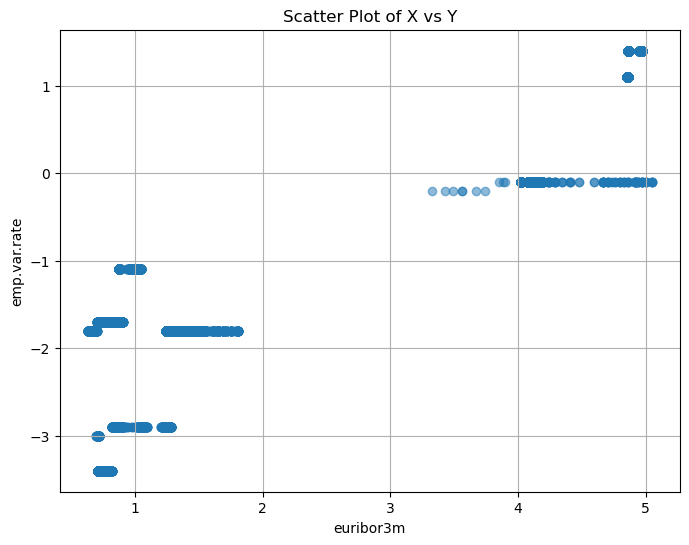

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(df['euribor3m'], df['emp.var.rate'], alpha=0.5)  # Plotting a scatter plot
plt.title('Scatter Plot of X vs Y')
plt.xlabel('euribor3m')
plt.ylabel('emp.var.rate')
plt.grid(True)
plt.show()

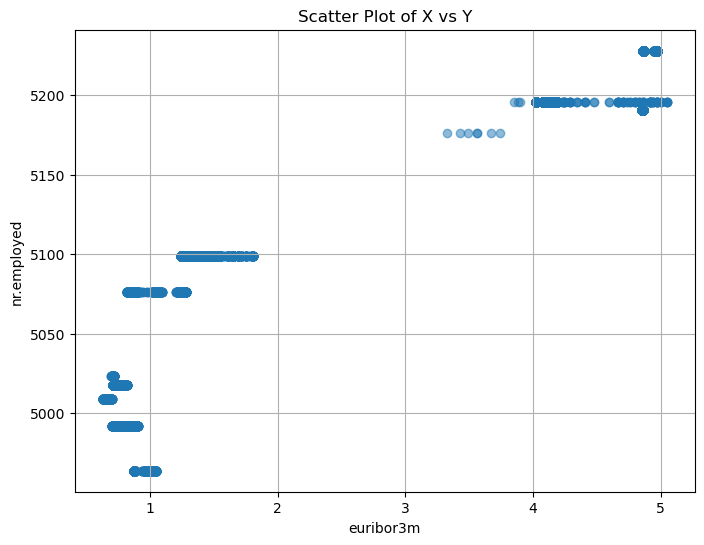

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(df['euribor3m'], df['nr.employed'], alpha=0.5)  # Plotting a scatter plot
plt.title('Scatter Plot of X vs Y')
plt.xlabel('euribor3m')
plt.ylabel('nr.employed')
plt.grid(True)
plt.show()

In [16]:
df_clean = df.drop(columns=['emp.var.rate', 'nr.employed'])

In [18]:
clean_corr = df_clean.corr(numeric_only=True)

In [20]:
# Extract the upper triangle of the correlation matrix (excluding the diagonal)
upper_triangle = clean_corr.where(np.triu(np.ones(clean_corr.shape), k=1).astype(bool))

# Flatten and sort the values
sorted_values = upper_triangle.stack().sort_values(ascending=False)

print(sorted_values)

cons.price.idx  euribor3m         0.685438
pdays           euribor3m         0.298457
cons.conf.idx   euribor3m         0.276019
campaign        euribor3m         0.133456
age             cons.conf.idx     0.130679
campaign        cons.price.idx    0.126651
pdays           cons.price.idx    0.074684
cons.price.idx  cons.conf.idx     0.057535
campaign        pdays             0.051421
age             previous          0.027901
duration        previous          0.020827
age             euribor3m         0.009191
duration        cons.price.idx    0.006150
age             campaign          0.003190
                cons.price.idx    0.000639
                duration          0.000334
duration        cons.conf.idx    -0.007736
campaign        cons.conf.idx    -0.013280
duration        euribor3m        -0.034499
age             pdays            -0.036749
duration        pdays            -0.048131
previous        cons.conf.idx    -0.054443
duration        campaign         -0.073863
campaign   

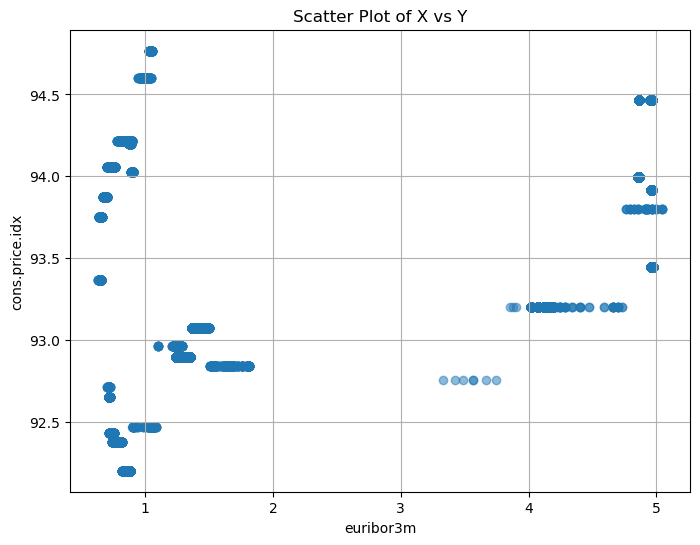

In [21]:
plt.figure(figsize=(8, 6))
plt.scatter(df['euribor3m'], df['cons.price.idx'], alpha=0.5)  # Plotting a scatter plot
plt.title('Scatter Plot of X vs Y')
plt.xlabel('euribor3m')
plt.ylabel('cons.price.idx')
plt.grid(True)
plt.show()

In [34]:
df['pdays'].value_counts()


999    31722
3        359
6        325
4        101
12        54
7         48
9         48
2         47
10        46
5         38
13        26
11        21
1         20
15        17
14        17
8         15
0         12
16        10
17         7
18         6
19         3
22         2
21         2
25         1
26         1
27         1
20         1
Name: pdays, dtype: int64

In [35]:
(31722)/(len(df))

0.9627314112291351